<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras as K
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras import utils

In [ ]:
from keras.src import callbacks
from keras.optimizers import Adam, Adamax
from keras.callbacks import EarlyStopping

In [ ]:
num_classes = 10 # загальна кількість класів
img_row, img_col = 28, 28
image_shape = (img_row, img_col, 1)

In [ ]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [ ]:
# Перетворюємо цілочисельні пікселі на тип float32 i Нормалізуємо
x_train, x_test = np.array(x_train, np.float32) / 255., np.array(x_test, np.float32) / 255.
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
# y_train = utils.to_categorical(y_train, 10)
# y_test = utils.to_categorical(y_test, 10)

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [ ]:
# Створимо нейронну мережу "Simply model"
model0 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                200736    
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                      

In [ ]:
model0.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
X_train, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.15)

In [ ]:
X_train.shape, y_tr.shape, X_val.shape, y_val.shape

((51000, 28, 28, 1), (51000,), (9000, 28, 28, 1), (9000,))

In [ ]:
y_tr[:5],

(array([1, 4, 7, 2, 0], dtype=uint8),)

In [ ]:
# Тренування мережі
history = model0.fit(X_train, y_tr, batch_size=1024,
                    epochs=35,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/35
50/50 [==============================] - 18s 332ms/step - loss: 0.9116 - accuracy: 0.7012 - val_loss: 0.5062 - val_accuracy: 0.8234
Epoch 2/35
50/50 [==============================] - 16s 321ms/step - loss: 0.4728 - accuracy: 0.8371 - val_loss: 0.4176 - val_accuracy: 0.8552
Epoch 3/35
50/50 [==============================] - 17s 337ms/step - loss: 0.4184 - accuracy: 0.8551 - val_loss: 0.3837 - val_accuracy: 0.8679
Epoch 4/35
50/50 [==============================] - 16s 322ms/step - loss: 0.3886 - accuracy: 0.8658 - val_loss: 0.3652 - val_accuracy: 0.8717
Epoch 5/35
50/50 [==============================] - 16s 320ms/step - loss: 0.3698 - accuracy: 0.8725 - val_loss: 0.3570 - val_accuracy: 0.8741
Epoch 6/35
50/50 [==============================] - 17s 332ms/step - loss: 0.3543 - accuracy: 0.8773 - val_loss: 0.3337 - val_accuracy: 0.8847
Epoch 7/35
50/50 [==============================] - 16s 318ms/step - loss: 0.3380 - accuracy: 0.8821 - val_loss: 0.3348 - val_accuracy: 0.8806

In [ ]:
score = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.2759903073310852
Test accuracy:  0.9009000062942505


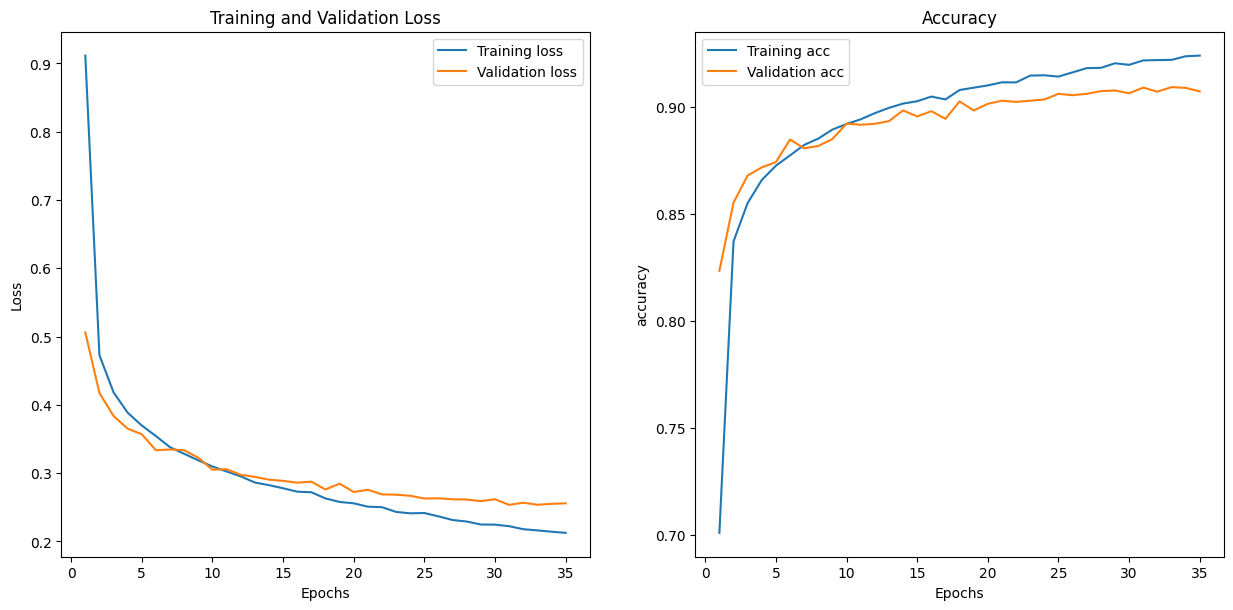

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model0.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted_classes, target_names=class_name)


313/313 [==============================] - 1s 3ms/step


In [ ]:
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.90      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.85      0.84      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.82      0.86      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.61      0.70      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle_boot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
y_train[:5],

(array([8, 1, 9, 2, 1], dtype=uint8),)

Ускладнимо модель

In [ ]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),

    Dropout(0.3),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                      

In [ ]:
X_train, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
history2 = model1.fit(X_train, y_tr, batch_size=512,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 106s 1s/step - loss: 0.9694 - accuracy: 0.6442 - val_loss: 0.4875 - val_accuracy: 0.8192
Epoch 2/20
94/94 [==============================] - 105s 1s/step - loss: 0.5166 - accuracy: 0.8102 - val_loss: 0.3982 - val_accuracy: 0.8541
Epoch 3/20
94/94 [==============================] - 104s 1s/step - loss: 0.4362 - accuracy: 0.8419 - val_loss: 0.3509 - val_accuracy: 0.8722
Epoch 4/20
94/94 [==============================] - 104s 1s/step - loss: 0.3948 - accuracy: 0.8574 - val_loss: 0.3132 - val_accuracy: 0.8832
Epoch 5/20
94/94 [==============================] - 104s 1s/step - loss: 0.3660 - accuracy: 0.8665 - val_loss: 0.3012 - val_accuracy: 0.8907
Epoch 6/20
94/94 [==============================] - 103s 1s/step - loss: 0.3359 - accuracy: 0.8781 - val_loss: 0.2738 - val_accuracy: 0.9008
Epoch 7/20
94/94 [==============================] - 103s 1s/step - loss: 0.3223 - accuracy: 0.8825 - val_loss: 0.2718 - val_accuracy: 0.8984
Epoch 8/20
94

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.22863613069057465
Test accuracy:  0.9186000227928162


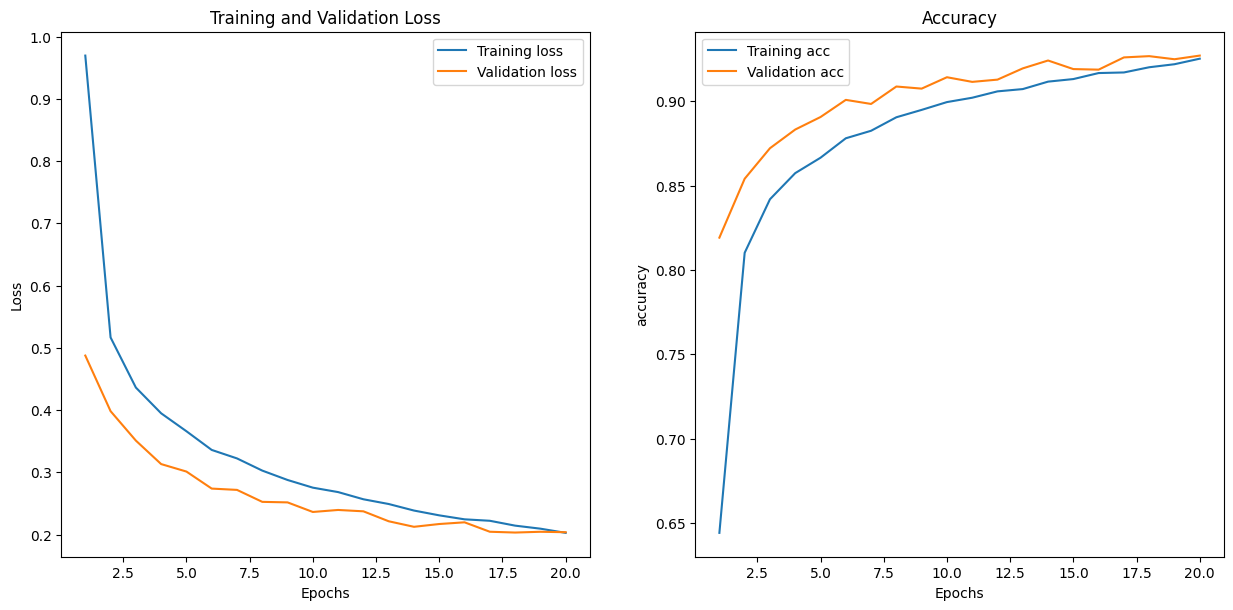

In [ ]:
history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Model3

In [ ]:
model3 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=image_shape, padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0

In [ ]:
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
X_train, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
history3 = model3.fit(X_train, y_tr, batch_size=512,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/30
94/94 [==============================] - 157s 2s/step - loss: 0.9545 - accuracy: 0.6636 - val_loss: 1.8817 - val_accuracy: 0.7707
Epoch 2/30
94/94 [==============================] - 152s 2s/step - loss: 0.5177 - accuracy: 0.8150 - val_loss: 1.4989 - val_accuracy: 0.8255
Epoch 3/30
94/94 [==============================] - 151s 2s/step - loss: 0.4347 - accuracy: 0.8436 - val_loss: 1.2672 - val_accuracy: 0.8571
Epoch 4/30
94/94 [==============================] - 152s 2s/step - loss: 0.3870 - accuracy: 0.8603 - val_loss: 0.9216 - val_accuracy: 0.8748
Epoch 5/30
94/94 [==============================] - 149s 2s/step - loss: 0.3437 - accuracy: 0.8771 - val_loss: 0.5746 - val_accuracy: 0.8923
Epoch 6/30
94/94 [==============================] - 151s 2s/step - loss: 0.3186 - accuracy: 0.8858 - val_loss: 0.3417 - val_accuracy: 0.9112
Epoch 7/30
94/94 [==============================] - 150s 2s/step - loss: 0.2997 - accuracy: 0.8939 - val_loss: 0.2616 - val_accuracy: 0.9103
Epoch 8/30
94

In [ ]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.2694471478462219
Test accuracy:  0.9232000112533569


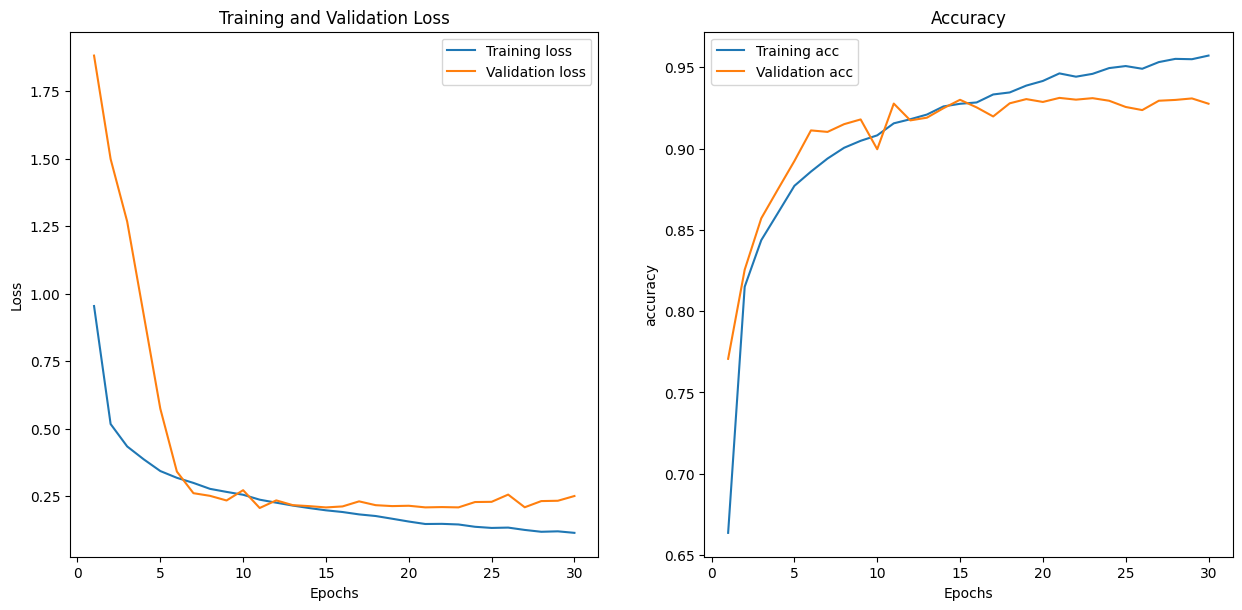

In [ ]:
history_dict = history3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Model 2 with number epoch = 30

In [ ]:
X_train, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
history4 = model1.fit(X_train, y_tr, batch_size=512,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/30
94/94 [==============================] - 158s 2s/step - loss: 1.0500 - accuracy: 0.6042 - val_loss: 0.5267 - val_accuracy: 0.8125
Epoch 2/30
94/94 [==============================] - 154s 2s/step - loss: 0.5354 - accuracy: 0.8090 - val_loss: 0.4098 - val_accuracy: 0.8594
Epoch 3/30
94/94 [==============================] - 153s 2s/step - loss: 0.4445 - accuracy: 0.8406 - val_loss: 0.3635 - val_accuracy: 0.8765
Epoch 4/30
94/94 [==============================] - 153s 2s/step - loss: 0.3986 - accuracy: 0.8572 - val_loss: 0.3278 - val_accuracy: 0.8835
Epoch 5/30
94/94 [==============================] - 153s 2s/step - loss: 0.3619 - accuracy: 0.8697 - val_loss: 0.3080 - val_accuracy: 0.8895
Epoch 6/30
94/94 [==============================] - 151s 2s/step - loss: 0.3390 - accuracy: 0.8784 - val_loss: 0.2879 - val_accuracy: 0.8966
Epoch 7/30
94/94 [==============================] - 152s 2s/step - loss: 0.3167 - accuracy: 0.8851 - val_loss: 0.2738 - val_accuracy: 0.9027
Epoch 8/30
94

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.21296799182891846
Test accuracy:  0.9272000193595886


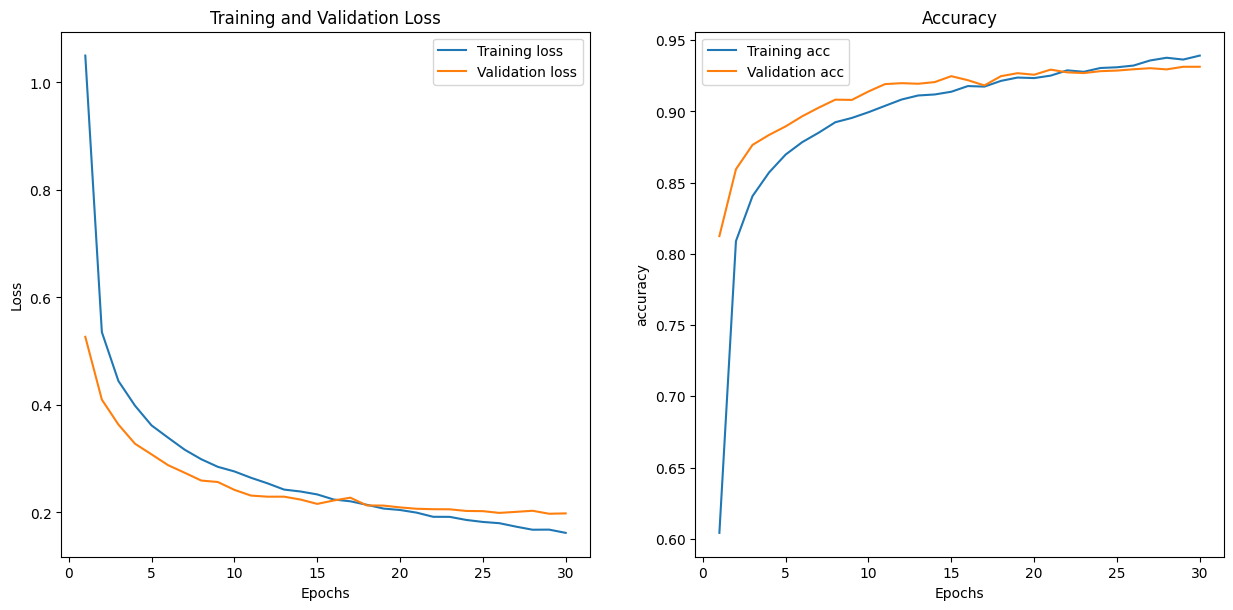

In [ ]:
history_dict = history4.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При використанні згорткової моделі для даного датасету вдалось покращити результати багатошарової моделі, а саме:
1.   Test loss:  0.21296799182891846
2.   Test accuracy:  0.9272000193595886

Кращі результати на тесті, які показала багатошарова модель з кількістю епох 30.
*  Test loss:  0.3095560669898987
*   Test accuracy:  0.8938000202178955